*Antes de leer el notebook hay que correr la siguiente celda*

In [ ]:
!pip install celluloid

In [ ]:
"Esta celda debe correr antes del resto del archivo"
# Librerias complementarias para trabajar metodos numericos
import numpy as np
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve, norm #, inv, eigsh
# Librerias graficas
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
import seaborn as sb
import pandas as pd
rc('text', usetex=False) # para usar latex en matplotlib
# Estilo de las figuras
sb.set_theme(style="darkgrid")
sb.set_palette('tab10')
# Librerias de animacion
import os
import imageio
from celluloid import Camera #pip install celluloid si es que no lo tienen.



*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Emir Chacra   
**Alumnos:** Rodrigo Fuentes, Mariano Vazquez, Manuel Torres

# Laboratorio 2

El objetivo de esta sesión es aplicar el método de diferencias finitas en varias variables para problemas de primer orden. Para ello, se estudiará la ecuación de advección de primer orden y la ecuación de Burgers, un modelo no lineal que permite modelar el tráfico vehicular.

## Ecuación de Advección

Sea un intervalo acotado $\Omega=\left(  a,b\right)  \subseteq\mathbb{R}$ y $\alpha>0$. Considere la el problema de advección de primer orden dado por 
$$
\begin{equation}
\left.
\begin{array}
[c]{rll}
\dfrac{\partial u}{\partial t}+\alpha\dfrac{\partial u}{\partial x}= &
0 & \qquad \text{para }\left(  t,x\right)  \in\mathbb{R}^{+}\times\Omega\\
u\left(  0,x\right)  = & u_{0}\left(  x\right)  & \qquad \text{para }x\in\Omega
\end{array}
\right\} \qquad (1)
\end{equation}
$$

Existen varios esquemas numéricos basados en diferencias finitas para analizar esta ecuación, pero tienen diversas particularidades. Elegir uno de ellos por sobre otro es una tarea difícil.

Sean $\Delta t>0$ y $N\in\mathbb{N}$. Definiendo $t_{n}=n\Delta t$ para $n\in\mathbb{N} \cup \left\{  0\right\}  $, $\Delta x=\dfrac{b-a}{N+1}$ y $x_{j}=a+j\Delta x$, para $j\in\{0,1,\ldots,N+1\}$; se denota $u_{j}^{n} = u\left(  t_{n},x_{j}\right)$. Los esquemas de tipo Lax son algunos de los más usados para resolver este tipo de problemas, siendo los más simples los esquemas de Lax-Friedrichs y de Lax-Wendroff, dados por

**a.** Lax-Friedrichs
$$
\dfrac{2u_{j}^{n+1}-\left(  u_{j+1}^{n}+u_{j-1}^{n}\right)  }{2\Delta
t}+\alpha\dfrac{u_{j+1}^{n}-u_{j-1}^{n}}{2\Delta x}=0
$$


**b.** Lax-Wendroff
$$
\dfrac{u_{j}^{n+1}-u_{j}^{n}}{\Delta t}+\alpha\dfrac{u_{j+1}^{n}-u_{j-1}^{n}%
}{2\Delta x}-\alpha^{2}\Delta t\dfrac{u_{j+1}^{n}-2u_{j}^{n}+u_{j-1}^{n}%
}{2\Delta x^2}=0
$$

### Ejercicio 1

Sean $\alpha,T>0$. Considere el siguiente problema
$$
\begin{array}{rll}
\displaystyle{\frac{\partial u}{\partial t}+\alpha\frac{\partial u}{\partial x}}  &
=0 & \qquad\text{para }\left(  t,x\right)  \in(0,T)\times\left(  0,1\right) \\
u(t,x+1)  &  =u(t,x) & \qquad\text{para }\left(  t,x\right)  \in\lbrack
0,T)\times\left[  0,1\right] \\
u\left(  0,x\right)   &  =u_{0}(x) & \qquad\text{para }x\in\left[  0,1\right]
\end{array}
$$

**a.** Programe una función que resuelva numéricamente esta ecuación por cada uno de los esquemas numéricos presentados anteriormente. Las entradas de cada programa deben ser $\alpha$, $\Delta t$, $N_{T}$, $N$ y $u_{0}$, donde $N_{T}$ es un entero tal que $N_{T}\Delta t=T$.

Para cada esquema despejamos el término $u^{n+1}_{j}$, luego podemos obtener una recurrencia temporal de la forma
\begin{equation*}
    u^{n+1}_{j} = c_{1}\cdot u^{n}_{j+1} +  c_{2}\cdot u^{n}_{j} + c_{3}\cdot u^{n}_{j-1}.
\end{equation*}

Para cada caso tenemos:

**a.** Lax-Friedrichs:

**b.** Lax-Wendroff:



In [ ]:
def resolver_adveccion(a, b, alpha, dt, NT, N, u0, esquema):
    """
    Resuelve la ecuacion de adveccion $\partial_t u+\alpha \partial_x u = 0$
    con condiciones periodicas, en el dominio (a,b) y un intervalo de 
    tiempo [0,T].
    -------
    Input:
    - a: float
        Extremo izquierdo del dominio
    - b: float > a
        Extremo derecho del dominio
    - alpha: float
    - dt: float
        paso temporal para el que se resolvera la ecuacion
    - NT: int
        Cumple NT * dt = T
    - N: int
        Cantidad de subintervalos en que se discretizara el dominio. El paso 
        espacial sera 1/N.
    - u0: callable
        Funcion con la condicion inicial del problema
    - esquema: {'LW', 'LF'}
        Esquema usado para resolver la ecuacion.
        - 'LW': Lax Wendroff
        - 'LF': Lax Friedrich
    -------
    Output:
    - x: numpy array, largo N+1
        Discretizacion del dominio donde se calculo la solucion
    - U: numpy array de (N+1)x(NT+1)
        Solucion, evaluada en la grilla en cada paso de tiempo. U[j,n] es la 
        solucion en x_j, en el tiempo t = n*dt.
    -------
    """
    _lambda_ = alpha*dt*N
    # Se declara y asigna la grilla de discretización del dominio
    x = np.linspace(a, b, N+1)
    # Discretización de u_0 (leer comentario antes de editar)
        # Hay que tener el cuidado de no cambiar el nombre de este arreglo, 
        # porque u0 es el nombre del input con la condicion inicial, si ambos se
        # llaman u_0 va a causar conflicto
    u_0 = [u0(x[j]) for j in range(N+1)]
    # Defininir matriz total, de dimensiones (NT+1)x(N+1)
    U = np.zeros((NT+1, N+1))
    # Reemplazar condicion de borde en la matrix, con balor u_0 (vector)
    U[0] = u_0 
    "Resolver problema segun el input -esquema-" 
    # Resolver el esquema con Lax-Wendroff
    if esquema == 'LW':
        # Definir los coeficientes de Lax-Wendroff (en funcion de lambda)
        c_1,c_2,c_3 = (0.5*_lambda_*(_lambda_-1),
                       1-_lambda_**2,
                       0.5*_lambda_*(_lambda_+1)) 
        print('Usaste con exito el esquema Lax-Wendroff')
    # Resolver el esquema con Lax-Friedrich
    elif esquema == 'LF':
        # Definir los coeficientes de Lax-Friedrich (PENDIENTE)
        c_1, c_2, c_3 = (0.5 - _lambda_,
                         0,
                         0.5 + _lambda_)
        print('Usaste con exito el esquema Lax-Friedrich')
    # Iterar sobre el paso del esquema dado por $t\in[0,Nt+1)$
    for t in range(1,NT+1):
        # Aca usamos de np.roll
            # Se puede ver la libreria aca
            # https://numpy.org/doc/stable/reference/generated/numpy.roll.html
        U[t] = c_1*np.roll(U[t-1], 1) + c_2*U[t-1] + c_3*np.roll(U[t-1], -1)
    # Salida
    output = x, U
    return output

A continuación testeamos el método creado para resolver la *ecuación de advección*, consideramos los datos necesarios para la resolución de la ecuación en la parte (b).

In [ ]:
"Test de los esquemas"
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.8 # Hay que probar la solucion para $mu\in\{0.8, 0.4, 0.1\}$
dx      = 0.01          # Salto espacial
dt      = (mu*dx)/alpha # Salto temporal
T       = 2             # Limite superior del dominio temporal
NT      = int(T/dt)     # El dominio temporal es $t\in[0,T]
N       = int(alpha/dx) # int(1/0.01), no borrar esta linea de comentario!
u0      = lambda x: np.sin(2*np.pi*x)  # Condicion inicial (funcion del espacio)

# Resultado del metodo resolver_adveccion para el esquema de Lax-Friedich
x, ULW = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LW')
y, ULF = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LF')

Usaste con exito el esquema Lax-Wendroff
Usaste con exito el esquema Lax-Friedrich


In [ ]:
"Test de dimensiones de los outputs del metodo -resolver_adeveccion-"
print(len(ULF))
print(len(ULF[1]))
print(len(ULW))
print(len(ULW[1]))
print(len(x))

251
101
251
101
101


Text(0, 0.5, '$u(x)$')

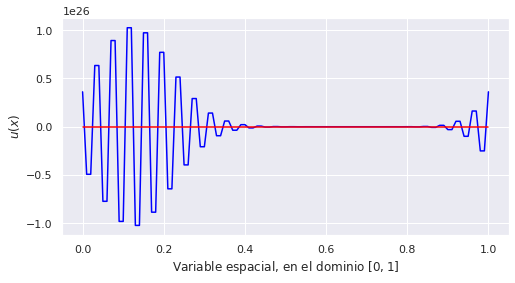

In [ ]:
"Test de ploteo de las soluciones mediante el esquema ULF"
# Figura
fig = plt.figure(figsize = (8,4)) 
# Instantes de testeo (se pueden editar los instantes de testeo)
i, j = 140, 70
# Parametros de la figura
plt.plot(
         x, ULF[i], 'blue',  # Da correcto c:
         x, ULW[j], 'red'    # Da un resultado sinusoidal en otro orden de magnitud, mucho mas pequeño que ULF
         )
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')

**b.** Considere $\Delta x=0.01$, $\alpha=1$, $\Delta t = \frac{\lambda}{\alpha}\Delta x$, $T=2$ y la condición inicial $u_{0}\left(  x\right)  =\sin\left(  2\pi x\right)  $. Calcule la solución numérica para $\lambda\in\left\{  0.8,0.4,0.1\right\}  $ y, para cada valor de $\lambda$, grafique las soluciones numéricas de cada método junto con la solución exacta.

Discuta los resultados en función de $\lambda$ y del tipo de
ecuación equivalente asociada a cada esquema.

**Indicación:** Utilice animaciones para observar la evolución de las soluciones.

Text(0, 0.5, '$u(x)$')

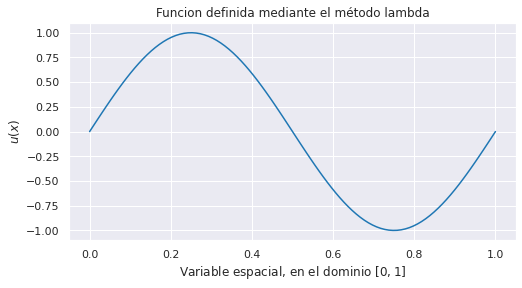

In [ ]:
# Funcion de la condicion inicial, i.e., cuando $u(x,0) = u_{0}$
u = lambda x,t: np.sin(2*np.pi*(x)) # Esta es una funcion test! 
# Test de la funcion
fig = plt.figure(figsize = (8,4)) 
plt.plot(np.linspace(0,1,100), u(np.linspace(0,1,100),3))
plt.title('Funcion definida mediante el método lambda')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')

Esquema de Lax-Friedrichs

$\lambda=0.1$

Usaste con exito el esquema Lax-Friedrich


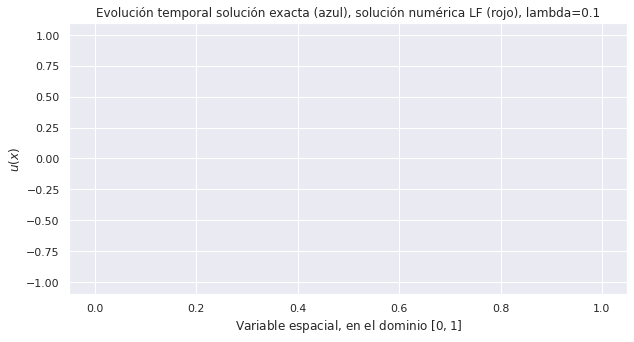

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.1
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: np.sin(2*np.pi*x)    # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), lambda=0.1')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1b.gif', writer = 'pillow', fps = 10)

$\lambda=0.4$

Usaste con exito el esquema Lax-Friedrich


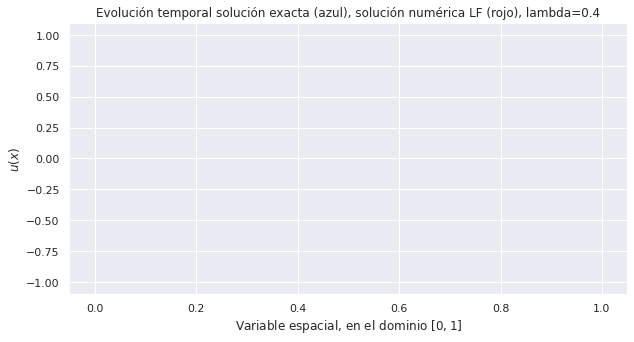

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.4
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: np.sin(2*np.pi*x)    # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), lambda=0.4')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1b0.4.gif', writer = 'pillow', fps = 10)

$\lambda=0.8$

Usaste con exito el esquema Lax-Friedrich


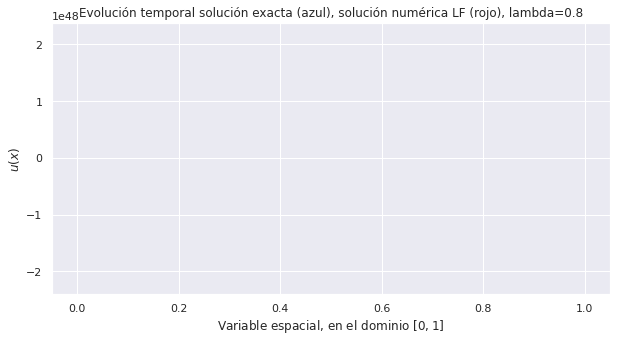

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.8
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: np.sin(2*np.pi*x)    # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), lambda=0.8')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1b0.8.gif', writer = 'pillow', fps = 10)

Es posible notar que para $\lambda = 0.4$ la solución numérica se asemeja a la solución real. Esto no sucede con $\lambda = 0.1$ ni $\lambda = 0.8$ pues en estos casos las soluciones tienen una amplitud muy pequeña y muy alta, respetivamente.

Esquema de Lax-Wendroff

$\lambda=0.8$

Usaste con exito el esquema Lax-Wendroff


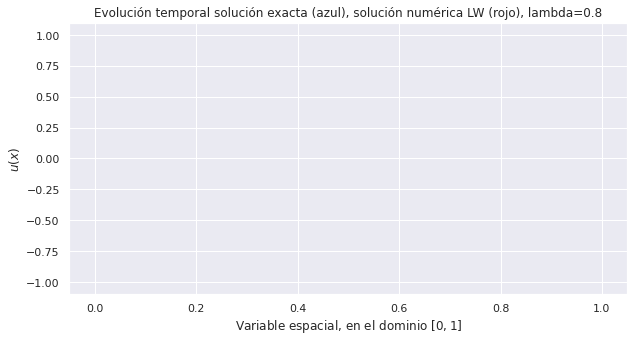

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.8
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: np.sin(2*np.pi*x)    # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Wendroff
x, ULW = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), lambda=0.8')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1bLW0.8.gif', writer = 'pillow', fps = 10)

$\lambda=0.4$

Usaste con exito el esquema Lax-Wendroff


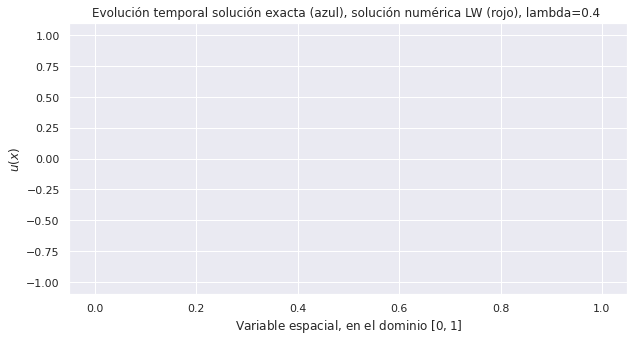

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.4
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: np.sin(2*np.pi*x)    # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Wendroff
x, ULW = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), lambda=0.4 ')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1bLW0.4.gif', writer = 'pillow', fps = 10)

$\lambda=0.1$

Usaste con exito el esquema Lax-Wendroff


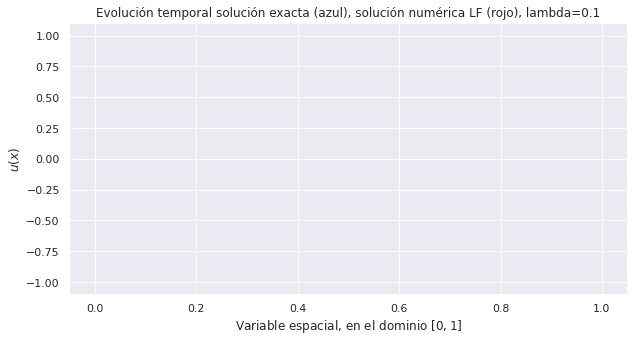

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.1
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: np.sin(2*np.pi*x)    # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Wendroff
x, ULW = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), lambda=0.1')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1bLW0.1.gif', writer = 'pillow', fps = 10)

A diferencia del método anterior, el valor de $\lambda$ no influye en la calidad de la solución pues en los tres casos es casi idéntica. 

**c.** Repita lo anterior, considerando ahora la condición inicial
$$
u_{0}\left(  x\right)  =\left\{
\begin{array}
[c]{cl}
1/2 & \text{si }x\in\left[  0.3,0.7\right]  \\
-1/2 & \text{si }x\in\left[  0,1\right]  \setminus [  0.3,0.7]
\end{array}
\right.
$$

**Indicación.** Considere una extensión periódica de $u_{0}$, la cual puede ser útil para graficar la solución real.

Lax-Friedrich

$\lambda=0.1$

Usaste con exito el esquema Lax-Friedrich


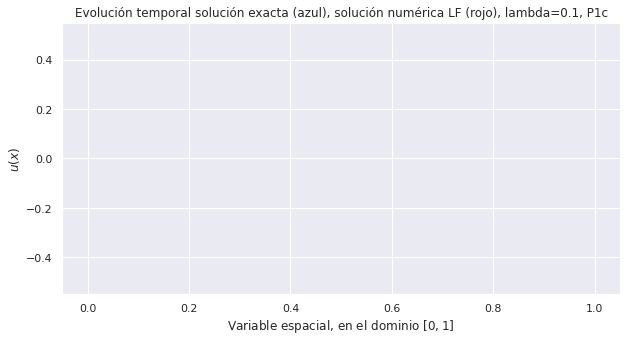

In [ ]:

#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.1
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x>=0.3 and x<=0.7)+(-0.5)*(x<0.3 or x>0.7)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), lambda=0.1, P1c')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1c0.1.gif', writer = 'pillow', fps = 10)

$\lambda=0.4$

Usaste con exito el esquema Lax-Friedrich


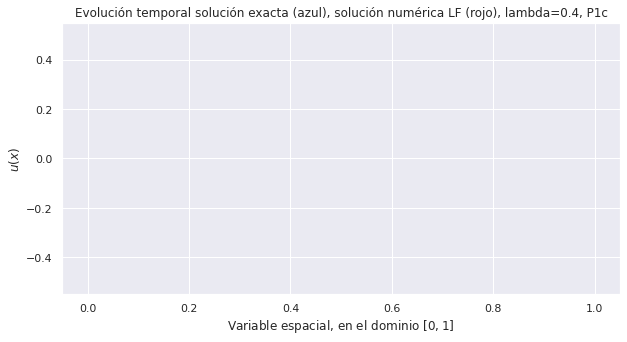

In [ ]:

#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.4
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x>=0.3 and x<=0.7)+(-0.5)*(x<0.3 or x>0.7)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), lambda=0.4, P1c')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1c0,4.gif', writer = 'pillow', fps = 10)

$\lambda=0.8$

Usaste con exito el esquema Lax-Friedrich


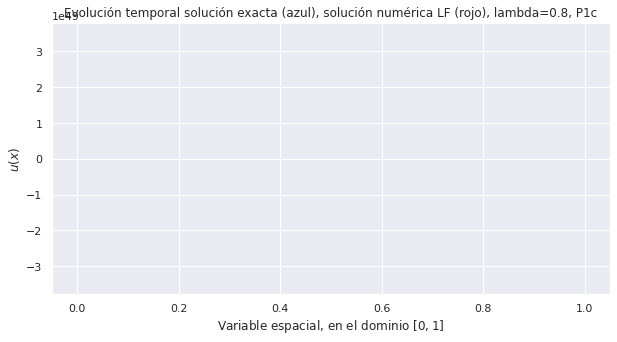

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.8
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x>=0.3 and x<=0.7)+(-0.5)*(x<0.3 or x>0.7)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), lambda=0.8, P1c')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1c0.8.gif', writer = 'pillow', fps = 10)

Para este método, el caso $\lambda = 0.4$ logra aproximar con mejor calidad la solución exacta.

Lax-Wendroff

$\lambda = 0.1 $

Usaste con exito el esquema Lax-Wendroff


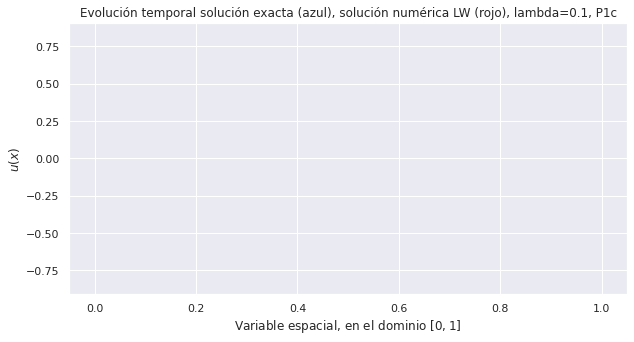

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.1
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x>=0.3 and x<=0.7)+(-0.5)*(x<0.3 or x>0.7)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULW = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), lambda=0.1, P1c')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1cLW0.1.gif', writer = 'pillow', fps = 10)

$\lambda=0.4$

Usaste con exito el esquema Lax-Wendroff


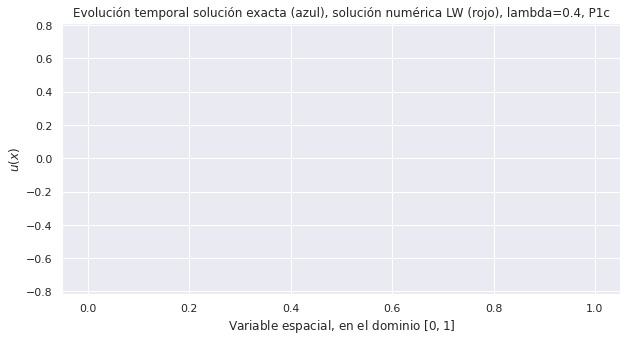

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.4
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x>=0.3 and x<=0.7)+(-0.5)*(x<0.3 or x>0.7)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULW = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), lambda=0.4, P1c')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1cLW0.4.gif', writer = 'pillow', fps = 10)

$\lambda = 0.8$

Usaste con exito el esquema Lax-Wendroff


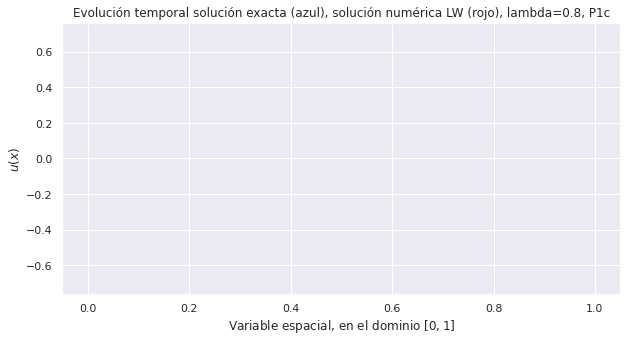

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.8
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x>=0.3 and x<=0.7)+(-0.5)*(x<0.3 or x>0.7)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULW = resolver_adveccion(a, b, alpha, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), lambda=0.8, P1c')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio1cLW0.8.gif', writer = 'pillow', fps = 10)

En este método, el valor de $\lambda$ no influye significativamente en la calidad de aproximación de la solución.

## Ecuación de Burgers aplicado al tráfico vehicular

Uno de los problemas más complicados en la ingeniería de transporte es modelar el funcionamiento de los semáforos. Un modelo continuo para el tráfico vehicular en una única pista, donde no se permite adelantar un automóvil, está dado por la ecuación de Burgers. Asuma que la velocidad máxima está dada por $V$ y la densidad de vehículos por unidad de longitud está dada por $D>0$. Si la velocidad $v$ y la densidad $\rho$ se relacionan mediante la ley
$$
v=V\left(  1-\dfrac{\rho}{D}\right)  \qquad \text{ para }\rho\in\left[
0,D\right]
$$
y se define $u=1-\dfrac{2\rho}{D}$, se puede probar que se cumple la ecuación dada por
$$
\begin{equation}
\left.
\begin{array}
[c]{rll}
\dfrac{\partial u}{\partial t}+u\dfrac{\partial u}{\partial x}= &
0 & \qquad \text{para }\left(  t,x\right)  \in\mathbb{R}^{+}\times\Omega\\
u\left(  0,x\right)  = & u_{0}\left(  x\right)  & \qquad \text{para }x\in\Omega
\end{array}
\right\} \qquad (2)
\end{equation}
$$
donde $-1\leq u\leq1$. El valor $u=-1$ significa que los vehículos no se mueven, pues se llegó a la densidad máxima, mientras que el valor $u=1$ representa que un vehículo que pase por la vía puede ir a la velocidad máxima permitida, puesto que la vía está totalmente vacía.

A diferencia de la primera ecuación analizada en este laboratorio, no es posible obtener una forma explícita para la solución de la ecuación de Burgers, aunque puede probarse que
$$
u\left(  t,x\right)  =u_{0}\left(  x-u\left(  t,x\right)  t\right)
$$
es una expresión implícita para la solución. Además, esta ecuación es no lineal, por lo que aplicar los mismos esquemas antes estudiados requiere un estudio más profundo.

Otra forma de escribir esta ecuación es
$$
\begin{equation}
\left.
\begin{array}
[c]{rll}
\dfrac{\partial u}{\partial t}+\dfrac{\partial}{\partial x}\left[  \dfrac
{1}{2}u^{2}\right]  = & 0 &\qquad \text{ para }\left(  t,x\right)  \in
\mathbb{R}^{+}\times\Omega\\
u\left(  0,x\right)  = & u_{0}\left(  x\right) &\qquad \text{ para }x\in\Omega
\end{array}
\right\} \qquad (3)
\end{equation}
$$

la cual se conoce como forma conservativa de la ecuación de Burgers. Esta forma es sumamente útil para presentar los esquemas de Lax-Friedrichs y Lax-Wendroff aplicados para esta ecuación. En general, dichos esquemas se presentan para ecuaciones de la forma $\dfrac{\partial u}{\partial t}+\dfrac{\partial}{\partial x}\left[  f\left(  u\right)  \right] =0$.

Definiendo $\lambda=\dfrac{\Delta t}{\Delta x}$ y $f_{j}^{n}=f(
u_{j}^{n})  $, se presentan los esquemas de Lax-Friedrichs y
Lax-Wendroff en su forma conservativa

$1)$ Lax Friedrichs conservativo:

    1) Paso 1:
$$
F_{j}^{n} = \frac{1}{2}(f_{j-1}^n + f_j^n) - \frac{1}{2\lambda}(u_j^n - u_{j-1}^n)
$$

    2) Paso 2:
$$
u_j^{n+1} = u_j^n - \lambda (F_{j+1}^n - F_j^n)
$$

$2)$ Lax-Wendroff conservativo (esquema de Richtmyer)
Es posible demostrar que estos esquemas son consistentes y convergentes, con
los mismos órdenes que en el caso lineal.

    1) Paso 1:
$$
u_{j+1/2}^n = \frac{1}{2}(u_{j+1}^n + u_j^n) - \frac{\lambda}{2}(f_{j+1}^n - f_j^n)
$$
$$
u_{j-1/2}^n = \frac{1}{2}(u_{j}^n + u_{j-1}^n) - \frac{\lambda}{2}(f_{j}^n - f_{j-1}^n)
$$

    2) Paso 2:
$$
u_{j}^{n+1} =u_{j}^{n}-\lambda\left(  f\left(  u_{j+1/2}^{n}\right)-f\left(  u_{j-1/2}^{n}\right)  \right)
$$

A continuación se simulará el efecto de un flujo de vehículos que entra a una calle a una velocidad mayor a la que tienen otros vehículos que circulan más adelante.

## Ejercicio 2

Sea $f$ una función de clase $\mathcal{C}^{1}$, $T>0$ y $a,b\in\mathbb{R}$, con $a<b$. Considere la ecuación.
$$
\begin{array}{rll}
\dfrac{\partial u}{\partial t}+\dfrac{\partial}{\partial x}\left[  f\left(
u\right)  \right]   &  =0 & \qquad\text{para }\left(  t,x\right)  \in
(0,T)\times\left(  a,b\right)  \\
u\left(  t,a\right)   &  =u_{a} & \qquad\text{para }t\in\left(  0,T\right]  \\
u\left(  t,b\right)   &  =u_{b} & \qquad\text{para }t\in\left(  0,T\right]  \\
u\left(  0,x\right)   &  =u_{0}(x) & \qquad\text{para }x\in\left[  0,1\right]
\end{array}
$$

**a.** Implemente cada uno de los esquemas de Lax para resolver numéricamente esta ecuación mediante una función. Las entradas de cada programa deben ser la función $f$, $a$, $b$, las condiciones de frontera $u_{a}$ y $u_{b}$, $\Delta t>0$, $N_{T}\in\mathbb{N}$ tal que $N_{T}\Delta t=T$, $N\in\mathbb{N}$ como la cantidad de puntos interiores en su particion del intervalo $\left[  a,b\right]  $ y la condición inicial $u_{0}$ como un vector $\boldsymbol{u}_{0}=\left(  u_{j}^{0}\right)  \in\mathbb{R}^{N+2}$.

In [ ]:
def resolver_ej2(f, a, b, ua, ub, dt, N_T, N, u0, esquema):  
    """
    Resuelve la ecuacion de Burgers del trafico vehicular presentada en el
    enunciado, dotada con condiciones periodicas, en el dominio (a,b) y un 
    intervalo de tiempo [0,T].
    -------
    Input:
    - f: function
        Funcion a evaluar en el operador de derivada espacial de la EDP
    - a: float
        Extremo izquierdo del dominio
    - b: float > a
        Extremo derecho del dominio
    - alpha: float
    - dt: float
        paso temporal para el que se resolvera la ecuacion
    - NT: int
        Cumple NT * dt = T
    - N: int
        Cantidad de subintervalos en que se discretizara el dominio. El paso 
        espacial sera 1/N.
    - u0: callable
        Funcion con la condicion inicial del problema
    - esquema: {'LW', 'LF'}
        Esquema usado para resolver la ecuacion.
        - 'LW': Lax Wendroff
        - 'LF': Lax Friedrich
    -------
    Output:
    - x: numpy array, largo N+1
        Discretizacion del dominio donde se calculo la solucion
    - U: numpy array de (N+1)x(NT+1)
        Solucion, evaluada en la grilla en cada paso de tiempo. U[j,n] es la 
        solucion en x_j, en el tiempo t = n*dt.
    -------
    """
    f_=f
    #Esta es la grilla de discretización del dominio
    x = np.linspace(a,b,N+1)
    #Discretización de u_0
    u_0 = [u0(x[j]) for j in range(N+1)]
    #Discretización de f_0
    f_0 = [f(u_0[j]) for j in range(N+1)]
    # Definimos la matriz U con su condicion
    U = np.zeros((N_T+1,N+1))
    U[0] = u_0
    # Definimos la matriz f con su condicion
    f = np.zeros((N_T+1,N+1))
    f[0] = f_0
    # Definimos la matriz F con su condicion (que se llena con un for)
    F = np.zeros((N_T+1,N+1))
    for j in range(1,N+1):
        F[0,j] = 0.5*(f[0,j-1]+f[0,j])-0.5*dt*N*(U[0,j]-U[0,j-1])
    # Definimos la matriz de $U_{j\pm1/2}$ y se asignan los valores respect.
    U_mas1_2        = np.zeros((N_T+1,N+1))
    U_mas1_2[0,0]   = 0.5*(U[0,1]+U[0,0])-0.5*dt*N*(f[0,1]-f[0,0])
    U_min1_2        = np.zeros((N_T+1,N+1))
    U_min1_2[0,N]   = 0.5*(U[0,N]+U[0,N-1])-0.5*dt*N*(f[0,N]-f[0,N-1])
    for j in range(1,N):
        U_mas1_2[0,j] = 0.5*(U[0,j+1]+U[0,j])-0.5*dt*N*(f[0,j+1]-f[0,j])
        U_min1_2[0,j] = 0.5*(U[0,j]+U[0,j-1])-0.5*dt*N*(f[0,j]-f[0,j-1])
    " Metodo de resolucion segun el input -esquema-"
    for t in range(1,NT+1):
        U[t,0] = ua
        U[t,N] = ub
        " Resolucion con el esquema de Lax-Wendroff"
        if esquema == 'LF':
            F[t,N] = 0.5*(f[t,N-1]+f[t,N])-0.5*dt*N*(U[t,N]-U[t,N-1])
            for j in range(1,N):
                # Guardar $F_{\cdot,\cdot}$
                F[t,j] = 0.5*(f[t,j-1]+f[t,j])-0.5*dt*N*(U[t,j]-U[t,j-1])
                # Guardar $U_{\cdot,\cdot}$
                U[t,j] = U[t-1,j]-dt*N*(F[t-1,j+1]-F[t-1,j])
        " Resolucion con el esquema de Lax-Friedrich"
        if esquema == 'LW':
            U_mas1_2[t,0] = 0.5*(U[t,1]+U[t,0])-0.5*dt*N*(f[t,1]-f[t,0])
            U_min1_2[t,N] = 0.5*(U[t,N]+U[t,N-1])-0.5*dt*N*(f[t,N]-f[t,N-1])
            for j in range(1,N):
                # Guardar $U_{\cdot+1/2}$ y $U_{\cdot-1/2}$ respectivamente 
                U_mas1_2[t,j] = 0.5*(U[t,j+1]+U[t,j])-0.5*dt*N*(f[t,j+1]-f[t,j])
                U_min1_2[t,j] = 0.5*(U[t,j]+U[t,j-1])-0.5*dt*N*(f[t,j]-f[t,j-1])
                # Guardar $U_{\cdot,\cdot}$
                U[t,j] = U[t-1,j] -dt*N*(f_(U_mas1_2[t-1,j])-f_(U_min1_2[t-1,j]))
    output = x, U
    return output

In [ ]:
"Test bajo el esquema de Lax-Friedich"
# Inputs para el metodo resolver_adveccion
a,b     = 0, 1
alpha   = 1
mu      = 0.8
dt      = (mu*0.01)/alpha
NT      = int(2/dt)
N       = int(1/0.01)
x = np.linspace(a, b)
f = lambda x: x**2/2
def u0(x):
    if x<0.2: 
        return 0.5
    else: 
        return 0
# u0      = lambda x: np.sin(2*np.pi*x)    # Condicion inicial (funcion del espacio)
# Resultado del metodo resolver_adveccion para el esquema de Lax-Friedich
    # x, ULW son inputs para el metodo de animar_soluciones
    # y, ULF son inputs para el metodo de animar_soluciones
    # Hay que tener cuidado de no mexclar los inputs! (pensando en que
    # hay que ingresar los esquemas por separado 
x, ULW = resolver_ej2(f, a, b,0,1, dt, NT, N, u0, 'LW')
y, ULF = resolver_ej2(f, a, b,0,1, dt, NT, N, u0, 'LF')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.



**b.** Considere el dominio $\Omega=\left[  0,1\right]  $, $D=1$, las condiciones de frontera $u\left(  t,0\right)  =0.5$ y $u\left(  t,1\right)  =0$ para todo $t>0$ y la condición inicial dada por
$$
u_{0}\left(  x\right)  =\left\{
\begin{array}
[c]{cc}%
0.5 & \text{si }x<0.2\\
0 & \text{si }x\geq0.2
\end{array}
\right.
$$
Resuelva numéricamente la ecuación de Burgers para este caso usando los esquemas conservativos de Lax-Friedrichs y Lax-Wendroff para $T=2$, $\Delta x\in\left\{  0.01,0.005,0.002\right\}  $ y $\Delta t=0.5\Delta x$. Grafique la velocidad y densidad apropiadamente.

Lax-Friendrichs 

$\Delta x = 0.01$

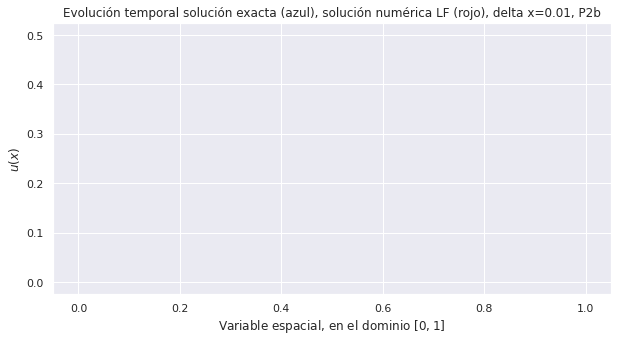

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
dx=0.01

a,b     = 0, 1
ua=0.5
ub=0
alpha   = 1
# mu      = 0.8
dt      = 0.5*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x<0.2)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), delta x=0.01, P2b')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio2bLF0.01.gif', writer = 'pillow', fps = 10)

$\Delta x = 0.005$

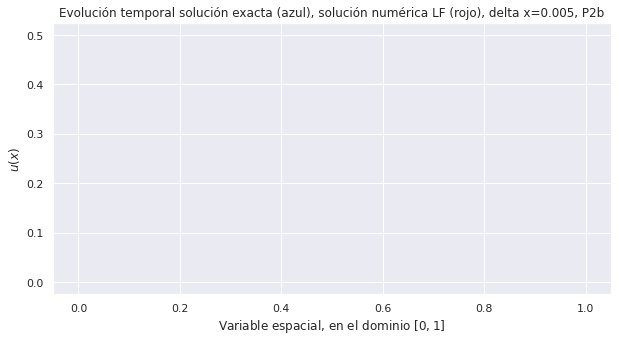

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
dx=0.005
ua=0.5
ub=0
a,b     = 0, 1
alpha   = 1
# mu      = 0.8
dt      = 0.5*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x<0.2)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), delta x=0.005, P2b')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio2bLF0.005.gif', writer = 'pillow', fps = 10)

$\Delta x = 0.002$

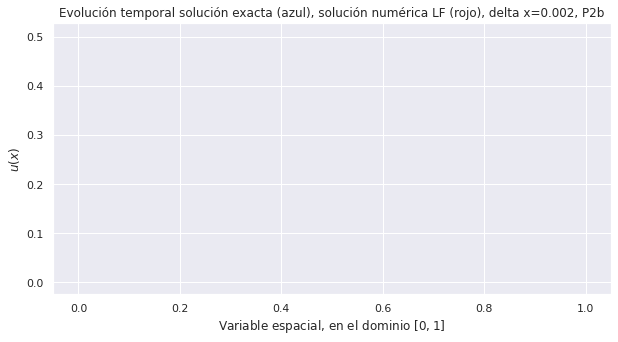

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
dx=0.002 
ua=0.5
ub=0
a,b     = 0, 1
alpha   = 1
# mu      = 0.8
dt      = 0.5*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x<0.2)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friedrichs
x, ULF = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LF')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LF (rojo), delta x=0.002, P2b')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio2bLF0.01.gif', writer = 'pillow', fps = 10)

En este método, no existen diferencias significativas al momento de variar $\Delta x$

Lax-Wendroff

$\Delta x=0.01$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


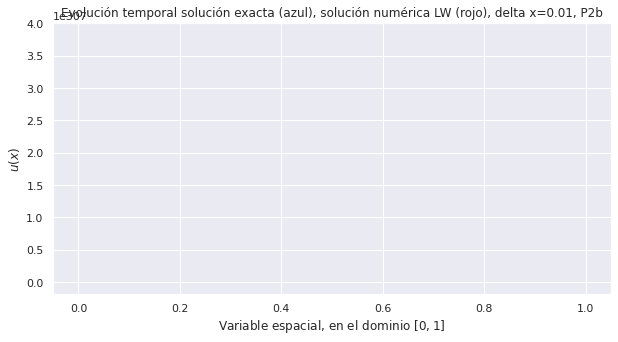

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
dx=0.01
ua=0.5
ub=0
a,b     = 0, 1
alpha   = 1
# mu      = 0.8
dt      = 0.5*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x<0.2)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Wendroff
x, ULW = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), delta x=0.01, P2b')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio2bLW0.01.gif', writer = 'pillow', fps = 10)

$\Delta x = 0.005$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


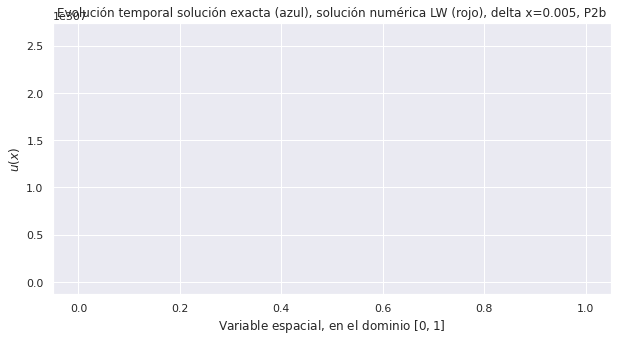

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
dx=0.005
ua=0.5
ub=0
a,b     = 0, 1
alpha   = 1
# mu      = 0.8
dt      = 0.5*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x<0.2)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Wendroff
x, ULW = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), delta x=0.005, P2b')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio2bLW0.005.gif', writer = 'pillow', fps = 10)

$\Delta x = 0.002 $

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


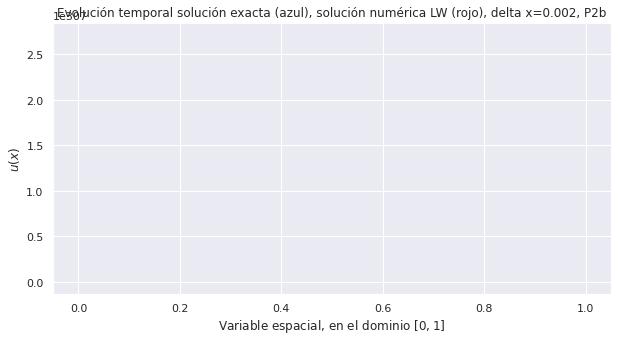

In [ ]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
dx=0.002
ua=0.5
ub=0
a,b     = 0, 1
alpha   = 1
# mu      = 0.8
dt      = 0.5*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: 0.5*(x<0.2)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Wendroff
x, ULW = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LW')

#Creamos fig
fig = plt.figure(figsize = (10,5))

#Creamos camera
camera = Camera(fig)

#Iteracion de la solución exacta
def u_exacta(u0,i):
    t=dt*i
    u = [u0(j-alpha*t) for j in x]
    return u
for n in range(NT+1):
  plt.plot(x, ULW[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
plt.title('Evolución temporal solución exacta (azul), solución numérica LW (rojo), delta x=0.002, P2b')
plt.xlabel('Variable espacial, en el dominio $[0,1]$')
plt.ylabel('$u(x)$')
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio2bLW0.002.gif', writer = 'pillow', fps = 10)

Este método entrega gráficas casi nulas de ámbas soluciones. Esto se debe a que ahora $\Delta t$ depende de $\Delta x$.

Ahora, se modelará el efecto de un semáforo en rojo, el cual cambiará a verde en un par de segundos. Para ello, considere que el tramo de vía a modelar es el intervalo $\left[ 0,2\right] $.

Si existe un semáforo en $x=1$, nuestro dominio de interés para modelar el efecto de la luz roja mediante la ecuación de Burgers será el intervalo $\left[  0,1\right]  $. Suponga que los autos entran por $x=0$ a una velocidad constante, la cual se representará por $u\left(  t,0\right)  =u^{\ast}$. Por otra parte, los vehículos deben detenerse frente al semáforo, por lo que
$u(t,1)=-1$.

Además, se asume que todos los vehículos circulaban a una velocidad inicial constante $u\left(  0,x\right)  =u^{\ast}$ hasta que ven el semáforo en rojo. En el instante $t=T$ en que el semáforo cambia a verde, la densidad de vehículos es nula en $\omega_{2}=\left(  1,2\right]  $. Luego, $u(T,x)=1$, para $x\in\omega_{2}$.

## Ejercicio 3
Simule el efecto del semáforo que cambia de color rojo a verde.


**a.** Resuelva numéricamente la ecuación de Burgers para $t\in\left[0,2\right]  $ en el dominio $\omega_{1}=\left[  0,1\right]  $, considerando la condición inicial
$$
u\left(  0,x\right)  =\left\{
\begin{array}
[c]{cl}%
u^{\ast} & \text{si }0\leq x<1\\
-1 & \text{si }x=1
\end{array}
\right.
$$
y las condiciones de frontera $u\left(  t,0\right)  =u^{\ast}$ y $u(t,1)=-1$, con $u^{\ast}=0.25$. Para ello, use el esquema de Lax-Friedrichs con $\Delta x=0.002$ y $\Delta t=0.1\Delta x$, simulando un semáforo en rojo que dure $T=2$.

In [48]:
#Animamos soluciones

#Declaramos parámtros (mu=0.1)
# Inputs para el metodo resolver_adveccion
dx=0.002
u_asterisco=0.25
ua=u_asterisco
ub=-1
f=lambda x: x**2/2
# f= lambda x: x
a,b     = 0, 1
alpha   = 1
# mu      = 0.8
dt      = 0.1*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: u_asterisco*(x >= 0 and x<1)+(-1)*(x==1)   # Condicion inicial (funcion del espacio)

#Resolvemos advección con método de Lax-Friendrichs
x, ULF = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LF')

# anim.save('Ejercicio3a.gif', writer = 'pillow', fps = 10)


**b.** Resuelva numéricamente la ecuación de Burgers para $t\in\left[2,4\right]  $ y $\Omega=\omega_{1}\cup\omega_{2}=\left[  0,2\right]  $, considerando las condiciones de frontera $u\left(  t,0\right)  =u^{\ast}$ y $u(t,2)=1$, y la condición inicial dada por
$$
u\left(  2,x\right)  =\left\{
\begin{array}
[c]{cl}%
u_{R}\left(  2,x\right)   & \text{si }0\leq x\leq1\\
1 & \text{si }x>1
\end{array}
\right.
$$
donde $u_{R}\left(  2,x\right)  $ es la solución numérica resultante en el ejercicio anterior. Use los mismos parámetros y esquema que la parte anterior y grafique su solución solo en el conjunto $\omega_1$.

In [49]:
def resolver_ej2(f, a, b, ua, ub, dt, N_T, N, u0, esquema):  
    """
    Resuelve la ecuacion de Burgers del trafico vehicular presentada en el
    enunciado, dotada con condiciones periodicas, en el dominio (a,b) y un 
    intervalo de tiempo [0,T].
    -------
    Input:
    - f: function
        Funcion a evaluar en el operador de derivada espacial de la EDP
    - a: float
        Extremo izquierdo del dominio
    - b: float > a
        Extremo derecho del dominio
    - alpha: float
    - dt: float
        paso temporal para el que se resolvera la ecuacion
    - NT: int
        Cumple NT * dt = T
    - N: int
        Cantidad de subintervalos en que se discretizara el dominio. El paso 
        espacial sera 1/N.
    - u0: callable
        Funcion con la condicion inicial del problema
    - esquema: {'LW', 'LF'}
        Esquema usado para resolver la ecuacion.
        - 'LW': Lax Wendroff
        - 'LF': Lax Friedrich
    -------
    Output:
    - x: numpy array, largo N+1
        Discretizacion del dominio donde se calculo la solucion
    - U: numpy array de (N+1)x(NT+1)
        Solucion, evaluada en la grilla en cada paso de tiempo. U[j,n] es la 
        solucion en x_j, en el tiempo t = n*dt.
    -------
    """
    f_=f
    #Esta es la grilla de discretización del dominio
    x = np.linspace(a,b,N+1)
    #Discretización de u_0
    u_0 = [u0(x[j]) for j in range(N+1)]
    #Discretización de f_0
    f_0 = [f(u_0[j]) for j in range(N+1)]
    # Definimos la matriz U con su condicion
    U = np.zeros((N_T+1,N+1))
    U[NT] = u_0
    # Definimos la matriz f con su condicion
    f = np.zeros((N_T+1,N+1))
    f[0] = f_0
    # Definimos la matriz F con su condicion (que se llena con un for)
    F = np.zeros((N_T+1,N+1))
    for j in range(1,N+1):
        F[0,j] = 0.5*(f[0,j-1]+f[0,j])-0.5*dt*N*(U[0,j]-U[0,j-1])
    # Definimos la matriz de $U_{j\pm1/2}$ y se asignan los valores respect.
    U_mas1_2        = np.zeros((N_T+1,N+1))
    U_mas1_2[0,0]   = 0.5*(U[0,1]+U[0,0])-0.5*dt*N*(f[0,1]-f[0,0])
    U_min1_2        = np.zeros((N_T+1,N+1))
    U_min1_2[0,N]   = 0.5*(U[0,N]+U[0,N-1])-0.5*dt*N*(f[0,N]-f[0,N-1])
    for j in range(1,N):
        U_mas1_2[0,j] = 0.5*(U[0,j+1]+U[0,j])-0.5*dt*N*(f[0,j+1]-f[0,j])
        U_min1_2[0,j] = 0.5*(U[0,j]+U[0,j-1])-0.5*dt*N*(f[0,j]-f[0,j-1])
    " Metodo de resolucion segun el input -esquema-"
    for t in range(1,NT+1):
        U[t,0] = ua
        U[t,N] = ub
        " Resolucion con el esquema de Lax-Wendroff"
        if esquema == 'LF':
            F[t,N] = 0.5*(f[t,N-1]+f[t,N])-0.5*dt*N*(U[t,N]-U[t,N-1])
            for j in range(1,N):
                # Guardar $F_{\cdot,\cdot}$
                F[t,j] = 0.5*(f[t,j-1]+f[t,j])-0.5*dt*N*(U[t,j]-U[t,j-1])
                # Guardar $U_{\cdot,\cdot}$
                U[t,j] = U[t-1,j]-dt*N*(F[t-1,j+1]-F[t-1,j])
        " Resolucion con el esquema de Lax-Friedrich"
        if esquema == 'LW':
            U_mas1_2[t,0] = 0.5*(U[t,1]+U[t,0])-0.5*dt*N*(f[t,1]-f[t,0])
            U_min1_2[t,N] = 0.5*(U[t,N]+U[t,N-1])-0.5*dt*N*(f[t,N]-f[t,N-1])
            for j in range(1,N):
                # Guardar $U_{\cdot+1/2}$ y $U_{\cdot-1/2}$ respectivamente 
                U_mas1_2[t,j] = 0.5*(U[t,j+1]+U[t,j])-0.5*dt*N*(f[t,j+1]-f[t,j])
                U_min1_2[t,j] = 0.5*(U[t,j]+U[t,j-1])-0.5*dt*N*(f[t,j]-f[t,j-1])
                # Guardar $U_{\cdot,\cdot}$
                U[t,j] = U[t-1,j] -dt*N*(f_(U_mas1_2[t-1,j])-f_(U_min1_2[t-1,j]))
    output = x, U
    return output

In [50]:
# #Animamos soluciones

# # Inputs para el metodo resolver_adveccion
dx=0.002
u_asterisco=0.25
ua=u_asterisco
ub=1
f       = lambda x: 0.5*u(x)**2
a,b     = 0, 2
alpha   = 1
 # mu      = 0.8
dt      = 0.1*dx
NT      = int(2/dt)
N       = int(1/0.01)
u0      = lambda x: ULF[10000][int(x/dx)]*(x>=0 and x<=1)+(x>1)   # Condicion inicial (funcion del espacio)

# #Resolvemos advección con método de Lax-Friendrichs
x, ULF = resolver_ej2(f, a, b,ua,ub, dt, NT, N, u0, 'LF')

# #Creamos fig
fig = plt.figure(figsize = (10,5))

# #Creamos camera
camera = Camera(fig)

 #Iteracion de la solución exacta
def u_exacta(u0,i):
  t=dt*i
  u = [u0(j-alpha*t) for j in x]
  return u
for n in range(NT+1):
  plt.plot(x, ULF[NT-n], 'r-')
  plt.plot(x,u_exacta(u0,n),'b-')
  camera.snap()
anim = camera.animate(blit = False, interval = 100)
anim.save('Ejercicio3b.gif', writer = 'pillow', fps = 10)

IndexError: ignored

**c.** Interprete los resultados